1. Importa las librerías necesarias y la base de datos, y realiza un análisis por variable
usando visualizaciones. Debes considerar las posibles correlaciones y representarlas
en un heatmap.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import BaggingRegressor

In [ ]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [ ]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [ ]:
# Contar los NaN por columna
count_nan_per_column = df.isna().sum()
print(count_nan_per_column)

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64


Una buena practica para entender la distribucion de las columnas, es la graficacion de estas una vez limpias, de esta forma se tendra una mejor idea general del problema existente.

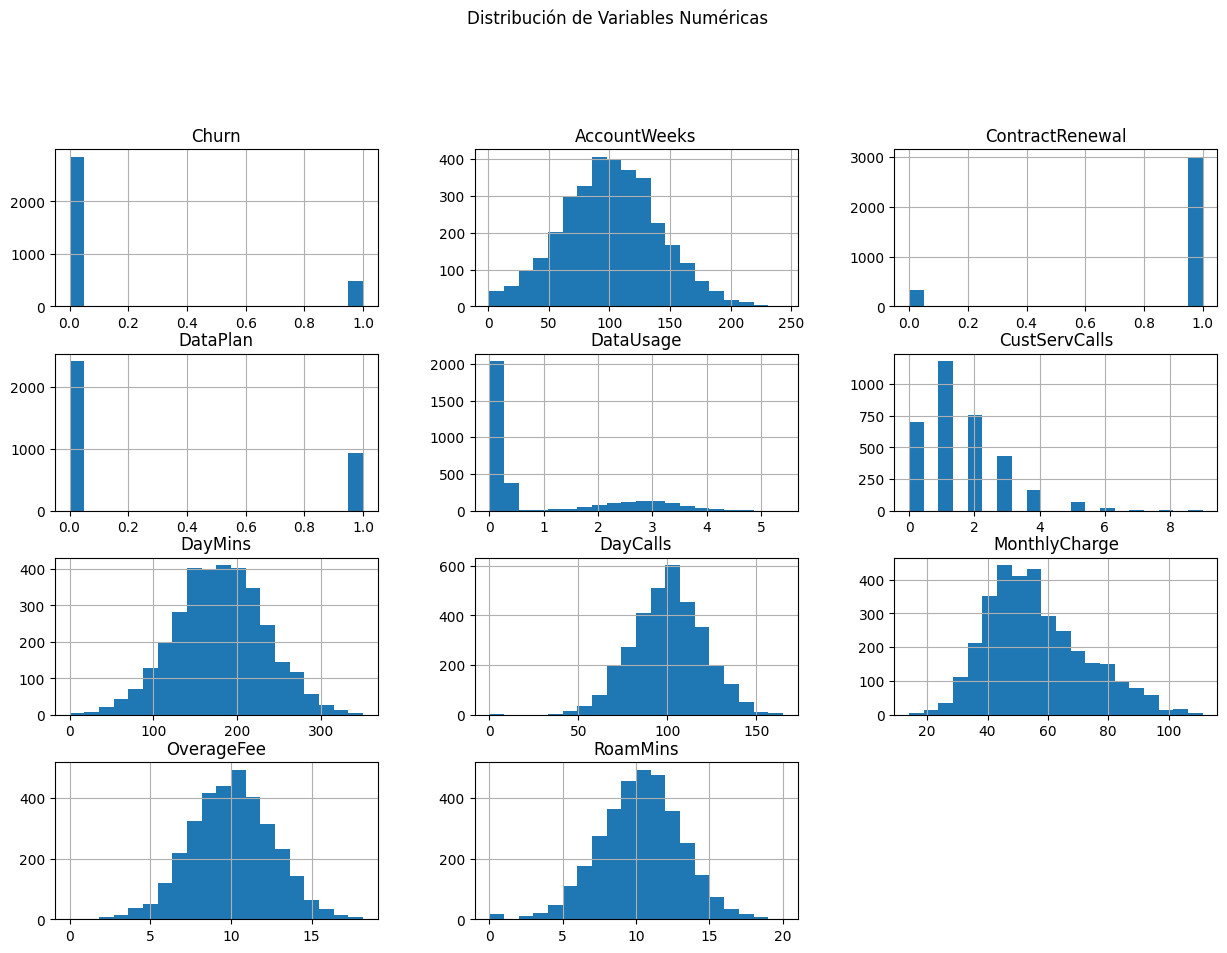

In [ ]:
# Graficar histogramas de todas las variables numéricas
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribución de Variables Numéricas', y=1.02)
plt.show()

In [ ]:
#Insertamos el comando para poder hacer la matriz de correlaciones que se pedirá en el grafico de calor
correlation_matrix = df.corr()

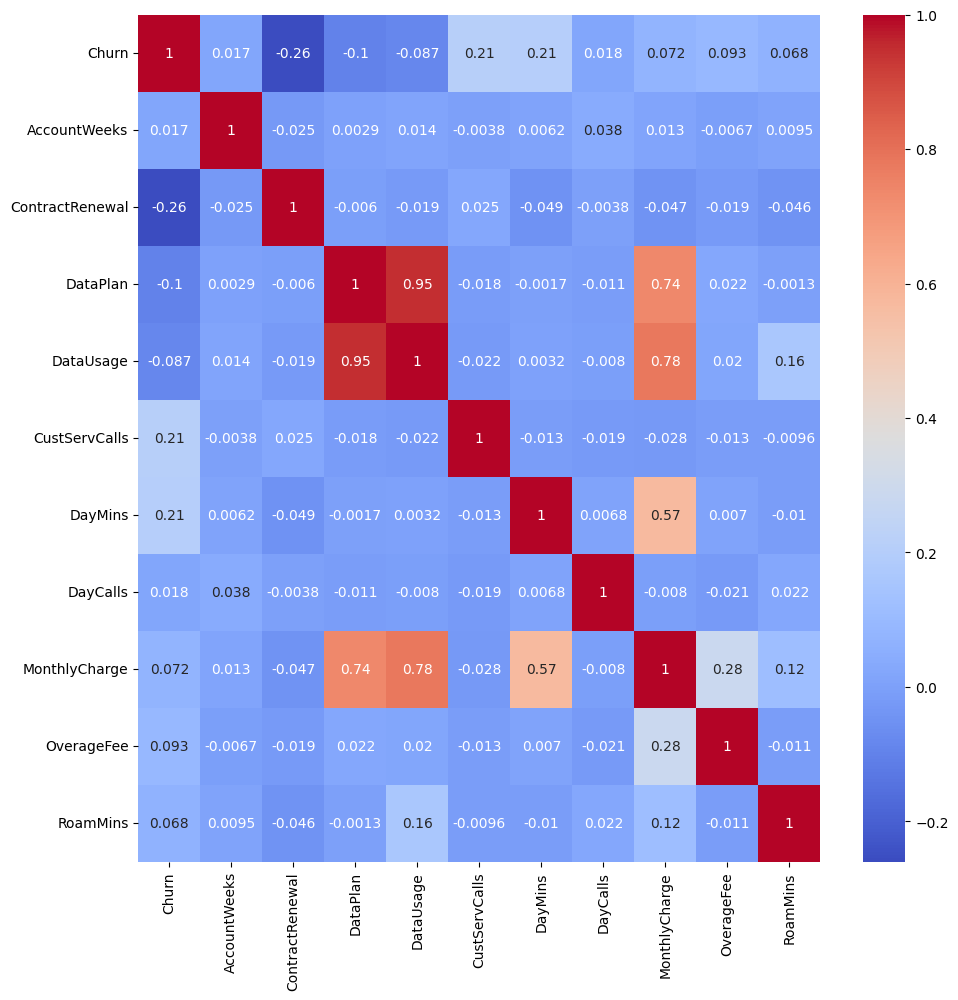

In [ ]:
# Crear un heatmap
plt.figure(figsize=(11, 11))  # Opcional: cambiar el tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)

# Mostrar el heatmap
plt.show()

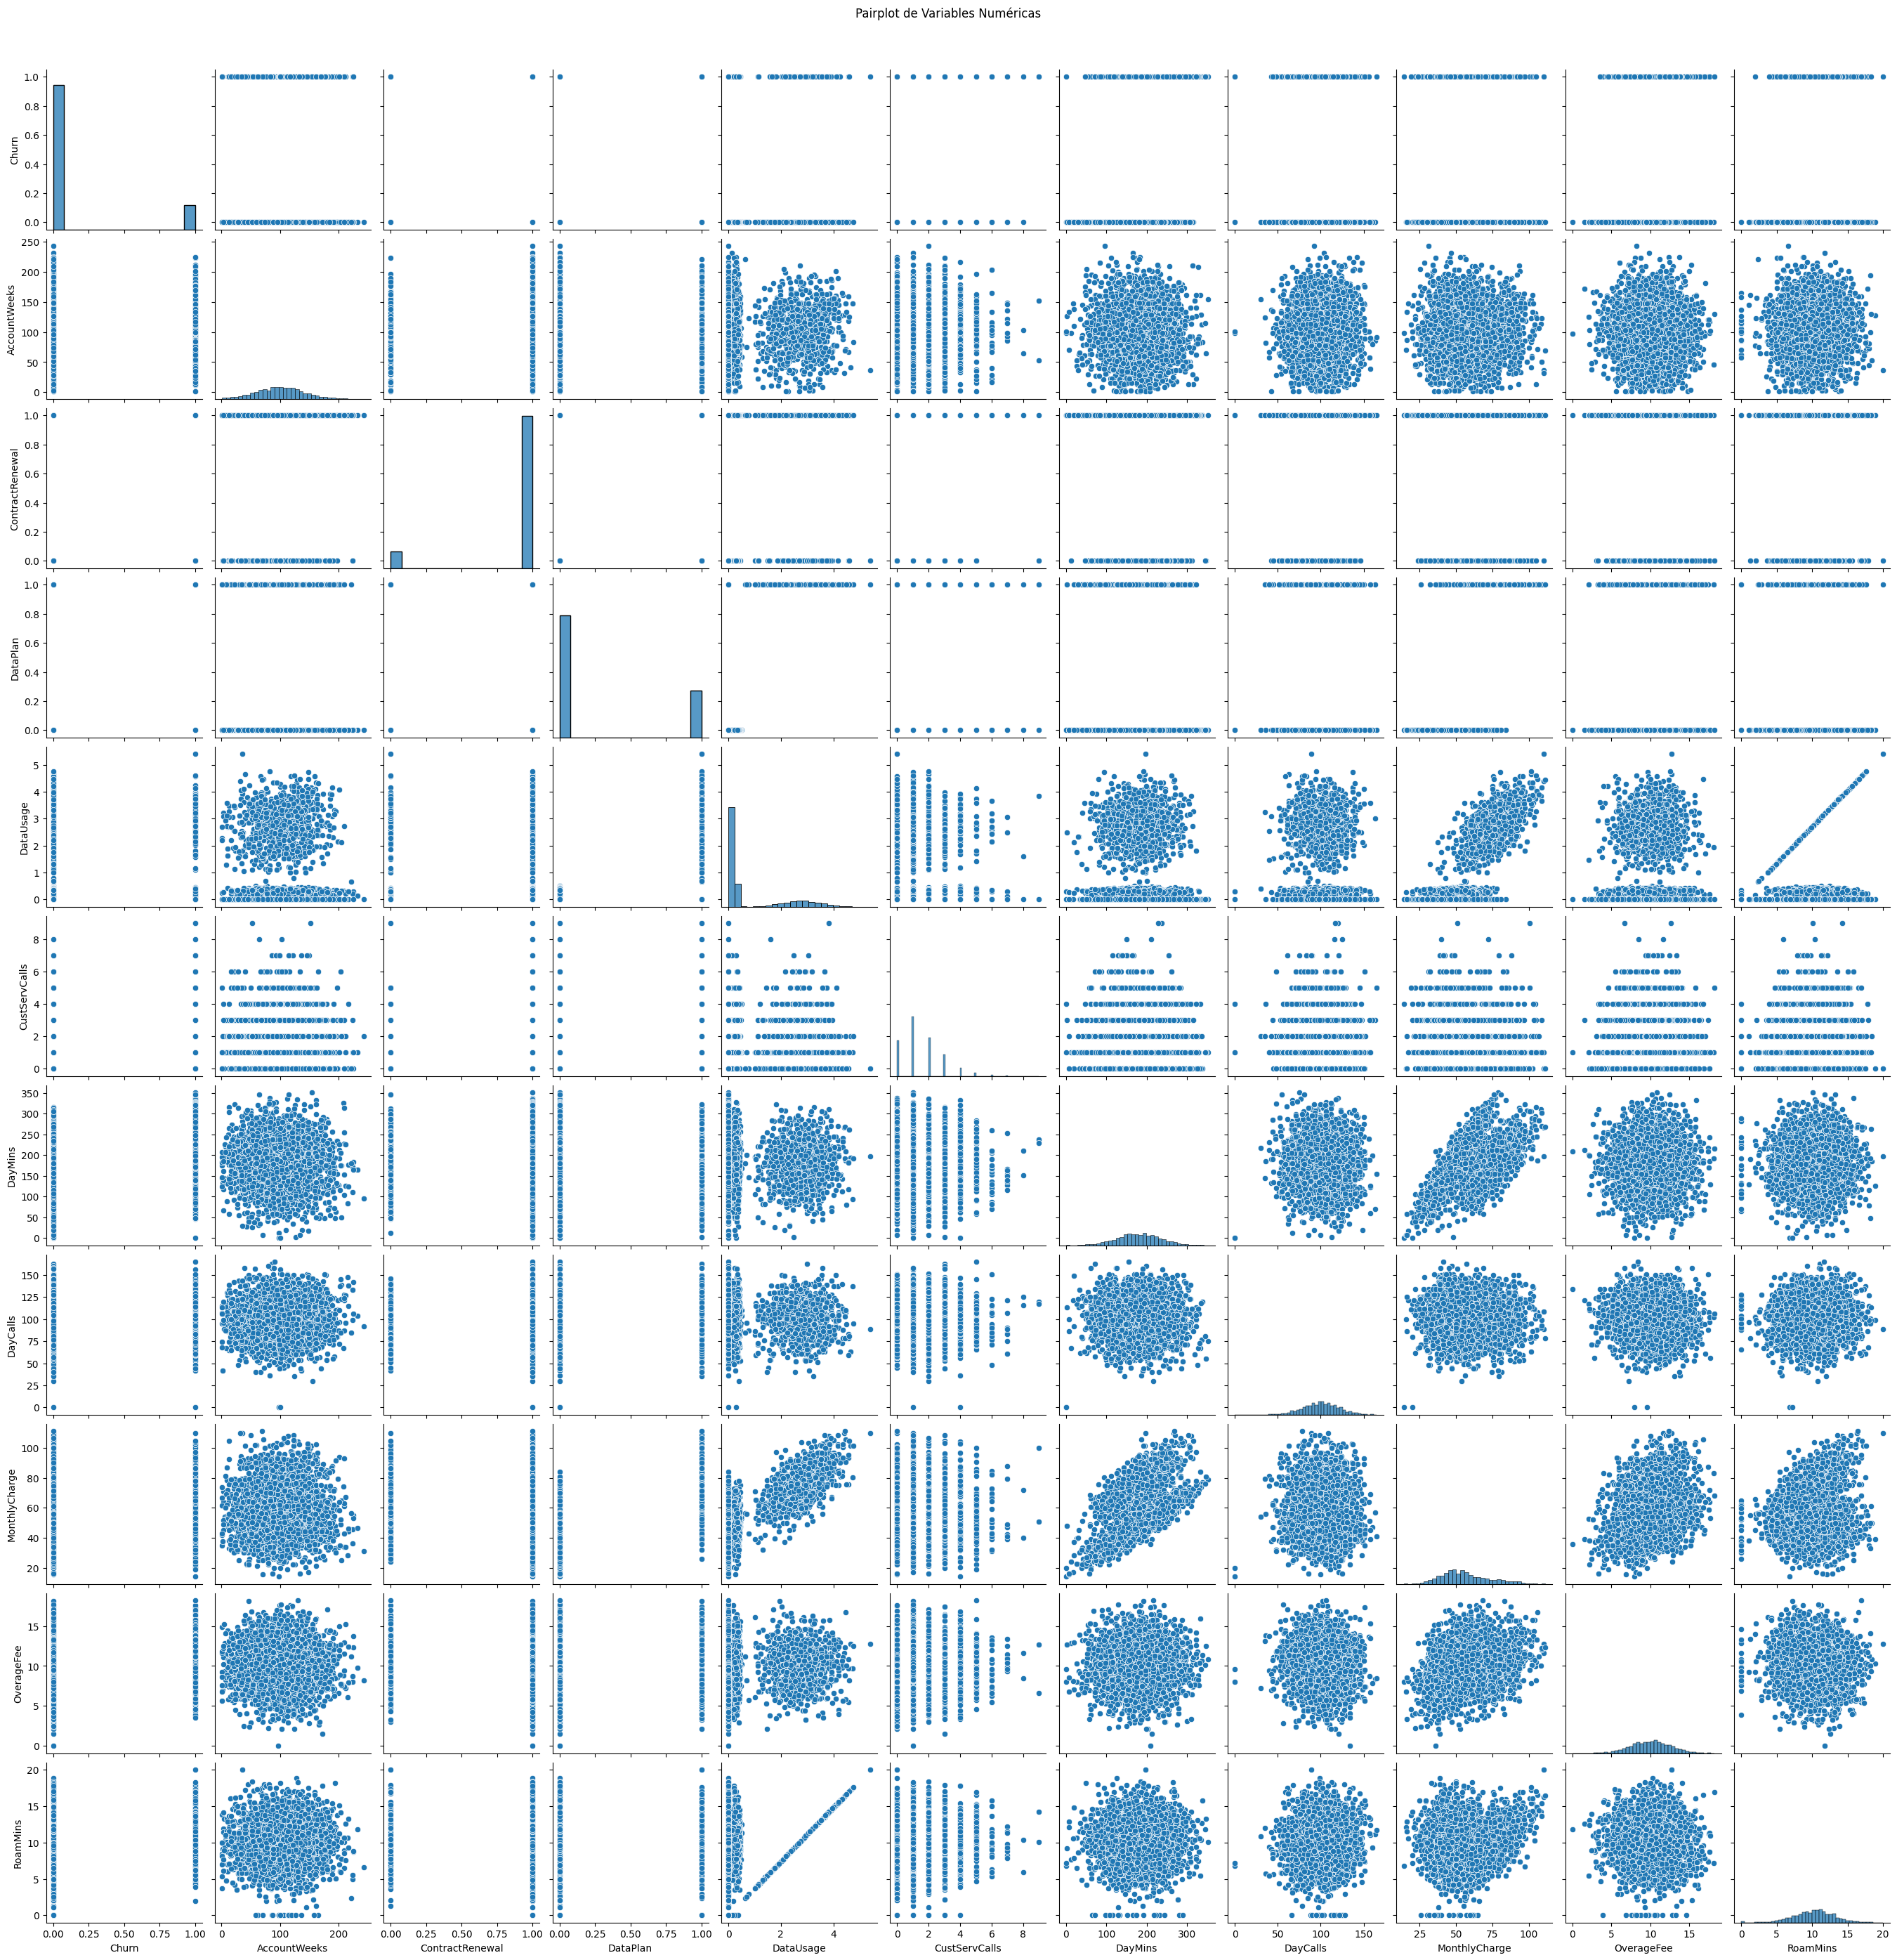

In [ ]:
# Graficar el pairplot para todas las variables numéricas
sns.pairplot(df)
plt.suptitle('Pairplot de Variables Numéricas', y=1.02)
plt.show()


Un grafico de bigote nos ayudará a entender los tipos de Outliers y cuando es necesario dejarlos o eliminarlos

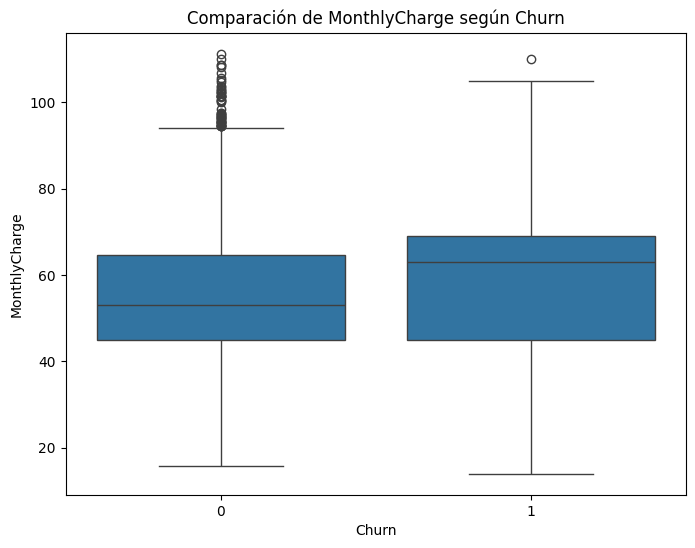

In [ ]:
# Boxplot para comparar MonthlyCharge entre Churn = 0 y Churn = 1
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharge', data=df)
plt.title('Comparación de MonthlyCharge según Churn')
plt.show()


Desarrollaremos un modelo de árbol de decisión sin modificar sus hiper parámetros, luego desplegaremos sus métricas de desempeño.

Luego, mejoraremos este modelo de forma de evitar el overfitting usando búsqueda por grilla con 5 kfol, de la siguiente manera:

max_depth: [5, 10, 15, 20, 25]
min_samples_split: [0.01, 0.02, 0.03, 0.04]

Mostraremos los mejores hiper parámetros encontrados y el desempeño del modelo,
tanto en los datos de entrenamiento como en los de test.

In [ ]:
# Separar características (X) y la variable objetivo (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de árbol de decisión sin modificar los hiperparámetros
clf = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
clf.fit(X_train, y_train)

# Predecir en los datos de prueba
y_pred = clf.predict(X_test)

# Evaluar el desempeño
print("Desempeño en el conjunto de entrenamiento:")
y_train_pred = clf.predict(X_train)
print(f"Accuracy en entrenamiento: {accuracy_score(y_train, y_train_pred)}")
print("Reporte de clasificación (entrenamiento):")
print(classification_report(y_train, y_train_pred))

print("\nDesempeño en el conjunto de prueba:")
print(f"Accuracy en prueba: {accuracy_score(y_test, y_pred)}")
print("Reporte de clasificación (prueba):")
print(classification_report(y_test, y_pred))

# Matriz de confusión
print("Matriz de confusión en el conjunto de prueba:")
print(confusion_matrix(y_test, y_pred))


Desempeño en el conjunto de entrenamiento:
Accuracy en entrenamiento: 1.0
Reporte de clasificación (entrenamiento):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2284
           1       1.00      1.00      1.00       382

    accuracy                           1.00      2666
   macro avg       1.00      1.00      1.00      2666
weighted avg       1.00      1.00      1.00      2666


Desempeño en el conjunto de prueba:
Accuracy en prueba: 0.8755622188905547
Reporte de clasificación (prueba):
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       566
           1       0.59      0.57      0.58       101

    accuracy                           0.88       667
   macro avg       0.76      0.75      0.75       667
weighted avg       0.87      0.88      0.87       667

Matriz de confusión en el conjunto de prueba:
[[526  40]
 [ 43  58]]


Si bien el modelo de entrenamiento funcionó correctamente, cuando estamos en el apartado de pruebas, es donde tenemos complicaciones, debido a que la baja cantidad de factores a analizar, existe un desbalanceo de clases, es por lo tanto que haremos un metodo de grilla para tratar de obtener mejores resultados posteriormente, aqui es donde se comienza a hacer el "feature engineering"

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros para la búsqueda por grilla
param_grid = {
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_split': [0.01, 0.02, 0.03, 0.04]
}

# Crear el clasificador de árbol de decisión
dt = DecisionTreeClassifier(random_state=42)

# Crear la búsqueda por grilla con validación cruzada de 5 folds
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Mejor modelo encontrado
best_model = grid_search.best_estimator_

# Evaluar el desempeño del modelo optimizado en el conjunto de entrenamiento
y_train_pred_best = best_model.predict(X_train)
print("\nDesempeño del modelo optimizado en el conjunto de entrenamiento:")
print(f"Accuracy en entrenamiento: {accuracy_score(y_train, y_train_pred_best)}")
print("Reporte de clasificación (entrenamiento):")
print(classification_report(y_train, y_train_pred_best))

# Evaluar el desempeño del modelo optimizado en el conjunto de prueba
y_test_pred_best = best_model.predict(X_test)
print("\nDesempeño del modelo optimizado en el conjunto de prueba:")
print(f"Accuracy en prueba: {accuracy_score(y_test, y_test_pred_best)}")
print("Reporte de clasificación (prueba):")
print(classification_report(y_test, y_test_pred_best))

# Matriz de confusión del modelo optimizado
print("Matriz de confusión en el conjunto de prueba (modelo optimizado):")
print(confusion_matrix(y_test, y_test_pred_best))


Mejores hiperparámetros encontrados:
{'max_depth': 5, 'min_samples_split': 0.03}

Desempeño del modelo optimizado en el conjunto de entrenamiento:
Accuracy en entrenamiento: 0.9366091522880721
Reporte de clasificación (entrenamiento):
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2284
           1       0.93      0.60      0.73       382

    accuracy                           0.94      2666
   macro avg       0.93      0.80      0.85      2666
weighted avg       0.94      0.94      0.93      2666


Desempeño del modelo optimizado en el conjunto de prueba:
Accuracy en prueba: 0.9115442278860569
Reporte de clasificación (prueba):
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       566
           1       0.85      0.50      0.63       101

    accuracy                           0.91       667
   macro avg       0.88      0.74      0.79       667
weighted avg       0.91      0.91

En el apartado de entrenamiento, se reduce la efectividad del caso normal anterior, sin embargo, tenemos una mejora considerable en la matriz de confusion, entonces es recomendable utilizar este modelo de entrenamiento, el de arbol de desiciones especializado

Balancearemos las clases usando SMOTE para el conjunto de entrenamiento. Luego, aplicaremos un modelo de Bagging con 200 estimadores y mostraremos las métricas sobre el conjunto de test.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separar características (X) y la variable objetivo (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE para balancear el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verificar el balance de clases después de SMOTE
print("Distribución de clases en el conjunto de entrenamiento (antes de SMOTE):")
print(y_train.value_counts())
print("\nDistribución de clases en el conjunto de entrenamiento (después de SMOTE):")
print(y_train_resampled.value_counts())


Distribución de clases en el conjunto de entrenamiento (antes de SMOTE):
Churn
0    2284
1     382
Name: count, dtype: int64

Distribución de clases en el conjunto de entrenamiento (después de SMOTE):
Churn
0    2284
1    2284
Name: count, dtype: int64


Hay un balanceo correcto de las clases, ahora veremos como funciona el entrenamiento bajo esta igualdad de condiciones

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Crear un modelo de Bagging usando árboles de decisión como base
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),  # Árbol de decisión como estimador base
    n_estimators=200,  # Número de estimadores
    random_state=42,
    n_jobs=-1  # Usar todos los núcleos de CPU disponibles
)

# Entrenar el modelo con el conjunto de entrenamiento balanceado
bagging_model.fit(X_train_resampled, y_train_resampled)

# Predecir en el conjunto de prueba
y_pred = bagging_model.predict(X_test)

# Evaluar el desempeño en el conjunto de prueba
print("\nDesempeño del modelo de Bagging sobre el conjunto de prueba:")
print(f"Accuracy en prueba: {accuracy_score(y_test, y_pred)}")
print("Reporte de clasificación (prueba):")
print(classification_report(y_test, y_pred))

# Matriz de confusión
print("Matriz de confusión en el conjunto de prueba:")
print(confusion_matrix(y_test, y_pred))



Desempeño del modelo de Bagging sobre el conjunto de prueba:
Accuracy en prueba: 0.8935532233883059
Reporte de clasificación (prueba):
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       566
           1       0.64      0.68      0.66       101

    accuracy                           0.89       667
   macro avg       0.79      0.81      0.80       667
weighted avg       0.90      0.89      0.90       667

Matriz de confusión en el conjunto de prueba:
[[527  39]
 [ 32  69]]


Implementaremos un modelo de Bagging usando modelos heterogéneos con los
siguientes estimadores: Regresión Logística, Árbol de decisión, y dos SVM de
clasificación con kernel ‘rbf’ y ‘sigmoid’. Para ello considera 200 muestras bootstr(T).

Debes calibrar la importancia de los modelos, repitiendo el modelo que sea más
importante en la lista de modelos a entrenar. Considera que un mejor modelo es
aquel con mejor f1-score.
Muestra las métricas del modelo final aplicado al conjunto de test.

Cargamos la herramienta de bagging heterogenea

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score

# Supongamos que ya tienes el DataFrame df cargado con las columnas mencionadas
X = df.drop('Churn', axis=1)
y = df['Churn']

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Crear los clasificadores
log_reg = LogisticRegression(random_state=42)
tree_clf = DecisionTreeClassifier(random_state=42)
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_sigmoid = SVC(kernel='sigmoid', random_state=42)

# Entrenar y evaluar el f1-score de cada modelo
models = [log_reg, tree_clf, svm_rbf, svm_sigmoid]
f1_scores = []

# Evaluar el f1-score de cada clasificador
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)
    print(f"F1-score para {model.__class__.__name__}: {f1}")

# Determinar el clasificador con mejor f1-score
best_model_index = np.argmax(f1_scores)
best_model = models[best_model_index]
print(f"\nEl mejor modelo basado en f1-score es: {best_model.__class__.__name__}")


F1-score para LogisticRegression: 0.22727272727272727
F1-score para DecisionTreeClassifier: 0.5829145728643216
F1-score para SVC: 0.0196078431372549
F1-score para SVC: 0.36363636363636365

El mejor modelo basado en f1-score es: DecisionTreeClassifier


In [ ]:
# Crear el conjunto de modelos heterogéneos, repitiendo el mejor modelo

# Si el mejor modelo es el más importante, lo repetimos en la lista
models_with_importance = models.copy()

# Si el mejor modelo es, por ejemplo, el Árbol de Decisión, lo repetimos
# Esto se hace al añadir el mejor modelo más veces en la lista de modelos
models_with_importance.extend([best_model] * 2)  # Repetir el mejor modelo 2 veces para darle más peso

# Aplicar el bagging con los modelos heterogéneos
final_model = bagging_het(X_train, y_train, T=200, estimators=models_with_importance, X_test=X_test)

# Desempaquetar la tupla devuelta por bagging_het
trained_model, yhat_test, yhat_out, idx_oob = final_model

# Predecir en el conjunto de prueba usando el primer modelo de la lista de modelos entrenados
y_pred_final = trained_model[0].predict(X_test)

# Evaluar el desempeño del modelo final
print("\nMétricas del modelo final (Bagging con modelos heterogéneos):")
print(f"F1-score final en prueba: {f1_score(y_test, y_pred_final)}")
print("Reporte de clasificación (prueba):")
print(classification_report(y_test, y_pred_final))

# Matriz de confusión del modelo final
from sklearn.metrics import confusion_matrix
print("Matriz de confusión en el conjunto de prueba (modelo final):")
print(confusion_matrix(y_test, y_pred_final))




Métricas del modelo final (Bagging con modelos heterogéneos):
F1-score final en prueba: 0.6341463414634146
Reporte de clasificación (prueba):
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       566
           1       0.62      0.64      0.63       101

    accuracy                           0.89       667
   macro avg       0.78      0.79      0.78       667
weighted avg       0.89      0.89      0.89       667

Matriz de confusión en el conjunto de prueba (modelo final):
[[527  39]
 [ 36  65]]


El modelo de Bagging está logrando un buen desempeño en general, con una precisión general de 89% en el conjunto de prueba. Sin embargo, hay un desequilibrio en el rendimiento entre las clases:

Clase 0: El modelo tiene un rendimiento excelente para la clase mayoritaria (precisión de 94% y recall de 93%). Que es informacion que ya teniamos anteriormente.

Clase 1: El rendimiento para la clase minoritaria es más limitado, con una precisión de 64% y una recall de 68%. Aunque la recall para la clase 1 es razonablemente alta, la precisión sigue siendo baja, lo que indica que el modelo a menudo predice falsos positivos para la clase 1, esto quiere decir que no hubo mucha diferencia en el cambio considerando el metodo SMOTE.

Implementaremos un modelo de ensamble Random Forest usando como hiper parámetro
n_estimators = 45.

El modelo debe usar muestra OOB para estimar su ajuste ACCURACY, y debe mostrar las cuatro características más importantes junto con las métricas de desempeño en el conjunto de test.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Crear el modelo Random Forest con 45 estimadores y OOB (Out-Of-Bag)
rf = RandomForestClassifier(n_estimators=45, oob_score=True, random_state=42)

# Entrenar el modelo
rf.fit(X_train, y_train)

# Obtener el accuracy de OOB
oob_accuracy = rf.oob_score_
print(f"Accuracy estimado usando OOB: {oob_accuracy}")


Accuracy estimado usando OOB: 0.9343585896474118


Una vez obtenida la mejor presicion posible despues de una ingenieria de caracteristicas ("feature engineering"), ahora le consultaremos al modelo, cuales son las caracteristicas mas importantes en la base de datos, con relacion a la columna Churn

In [ ]:
# Obtener las características más importantes
feature_importances = rf.feature_importances_

# Crear un DataFrame con las características y sus importancias
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Ordenar por la importancia
features_df = features_df.sort_values(by='Importance', ascending=False)

# Mostrar las 4 características más importantes
print("Las 4 características más importantes son:")
print(features_df.head(4))


Las 4 características más importantes son:
         Feature  Importance
5        DayMins    0.173453
7  MonthlyCharge    0.169345
4  CustServCalls    0.141764
8     OverageFee    0.102675


In [ ]:
# Predecir en el conjunto de prueba
y_pred = rf.predict(X_test)

# Calcular el accuracy en el conjunto de prueba
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy en el conjunto de prueba: {test_accuracy}")

# Reporte de clasificación
print("\nReporte de clasificación (prueba):")
print(classification_report(y_test, y_pred))

# Matriz de confusión
print("Matriz de confusión en el conjunto de prueba:")
print(confusion_matrix(y_test, y_pred))


Accuracy en el conjunto de prueba: 0.9295352323838081

Reporte de clasificación (prueba):
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       566
           1       0.86      0.64      0.73       101

    accuracy                           0.93       667
   macro avg       0.90      0.81      0.85       667
weighted avg       0.93      0.93      0.93       667

Matriz de confusión en el conjunto de prueba:
[[555  11]
 [ 36  65]]


Verdadero Positivo (TN): 555 — Predicciones correctas de que un cliente no abandonará (correctamente identificados como "no abandono").

Falso Positivo (FP): 11 — Clientes que realmente no abandonan, pero el modelo los clasifica como "abandono" (falsos positivos).

Falso Negativo (FN): 36 — Clientes que realmente abandonan, pero el modelo los clasifica como "no abandono" (falsos negativos).

Verdadero Positivo (TP): 65 — Clientes que realmente abandonan y son correctamente identificados como tal.

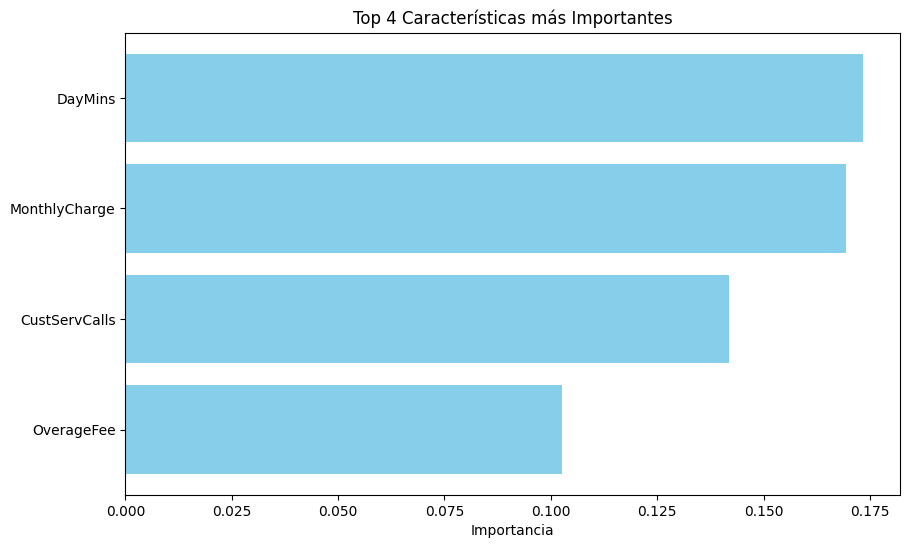

In [ ]:
# Graficar las 4 características más importantes
top_4_features = features_df.head(4)

plt.figure(figsize=(10, 6))
plt.barh(top_4_features['Feature'], top_4_features['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.title('Top 4 Características más Importantes')
plt.gca().invert_yaxis()  # Para que la característica más importante esté en la parte superior
plt.show()


Dado que estas características tienen una alta importancia en el modelo y considerando los buenos resultados obtenidos en términos de accuracy, podemos concluir lo siguiente:

DayMins y MonthlyCharge están siendo clave para identificar clientes con mayor probabilidad de abandono, ya que afectan directamente el comportamiento de uso y la percepción de costo del servicio.

CustServCalls refleja posibles problemas con la calidad del servicio. Un número elevado de llamadas al servicio al cliente podría estar contribuyendo a que el modelo identifique más fácilmente a los clientes con mayor riesgo de abandonar el servicio.

OverageFee también es una característica importante, ya que los cargos por excedentes son un factor que puede generar descontento, lo que podría estar relacionado con la intención de abandonar el servicio.

Realizaremos una búsqueda de grilla para un modelo Random Forest para los siguientes rangos de valores para sus hiper parámetros:

n_estimators: 50 - 200 con paso de 10 completando 15 valores
max_features: [‘sqrt’, ‘log2’, None]

Muestra los mejores hiper parámetros encontrados, la estimación de desempeño en
los datos OOB, y despliega los cuatro atributos más importantes.
¿Tienen sentido estos en comparacion al modelo anterior?
Analizaremos para ello las métricas de desempeño, ROC y AUC.

In [ ]:
# Definir el modelo Random Forest
rf = RandomForestClassifier(oob_score=True, random_state=42)

# Definir los parámetros para la búsqueda de grilla
param_grid = {
    'n_estimators': np.arange(50, 201, 10),  # De 50 a 200 con paso de 10
    'max_features': ['sqrt', 'log2', None]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Ajustar la búsqueda de grilla
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)


Mejores hiperparámetros encontrados:
{'max_features': 'sqrt', 'n_estimators': 160}


Con esta informacion sabemos cual es el nivel maximo de aprendizaje que tiene cuando utilizamos 160 estimadores, y nuestro mejor parametro sera la de raiz cuadrada 'sqrt'

Accuracy estimado en los datos OOB: 0.940735183795949
Las 4 características más importantes son:
         Feature  Importance
5        DayMins    0.189003
7  MonthlyCharge    0.173439
4  CustServCalls    0.141073
8     OverageFee    0.102307


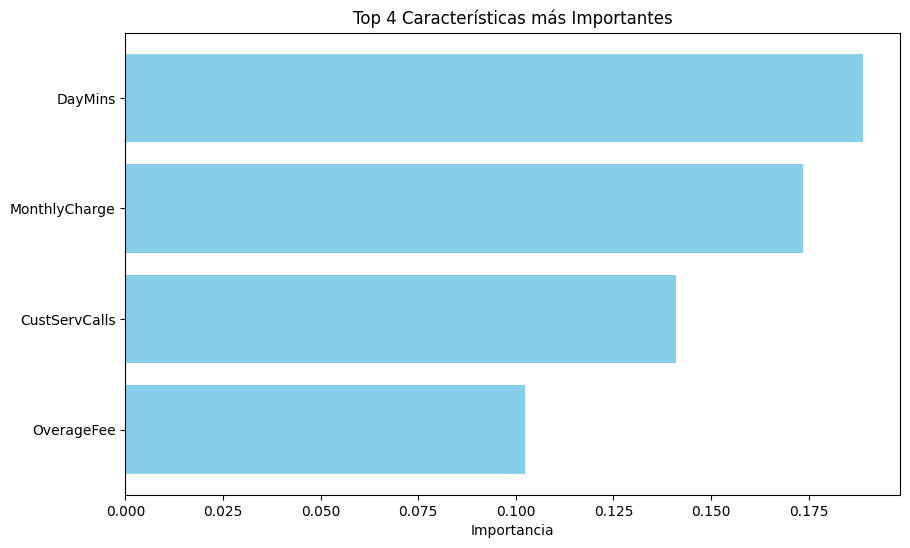

In [ ]:
# Mejor modelo encontrado
best_rf = grid_search.best_estimator_

# Estimación de desempeño en los datos OOB
print(f"Accuracy estimado en los datos OOB: {best_rf.oob_score_}")

# Obtener las características más importantes
feature_importances = best_rf.feature_importances_

# Crear un DataFrame con las características y sus importancias
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Ordenar por importancia
features_df = features_df.sort_values(by='Importance', ascending=False)

# Mostrar las 4 características más importantes
print("Las 4 características más importantes son:")
print(features_df.head(4))

# Graficar las 4 características más importantes
top_4_features = features_df.head(4)

plt.figure(figsize=(10, 6))
plt.barh(top_4_features['Feature'], top_4_features['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.title('Top 4 Características más Importantes')
plt.gca().invert_yaxis()  # Para que la característica más importante esté en la parte superior
plt.show()


El grafico es bastante autoconclusivo, el analisis esta en que debemos priorizar esas caracteristicas por sobre las otras columnas.
Un OBB con esos resultados señala que solo con el entrenamiento se puede obtener buenas estimaciones, sin necesidad de poner a prueba el modulo, aunque solo es como referencia, es necesario hacer el TEST de todas maneras, este solo es un indice de que vamos bien encaminados

Accuracy en el conjunto de prueba: 0.9265367316341829

Reporte de clasificación (prueba):
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       566
           1       0.85      0.62      0.72       101

    accuracy                           0.93       667
   macro avg       0.89      0.80      0.84       667
weighted avg       0.92      0.93      0.92       667

Matriz de confusión en el conjunto de prueba:
[[555  11]
 [ 38  63]]


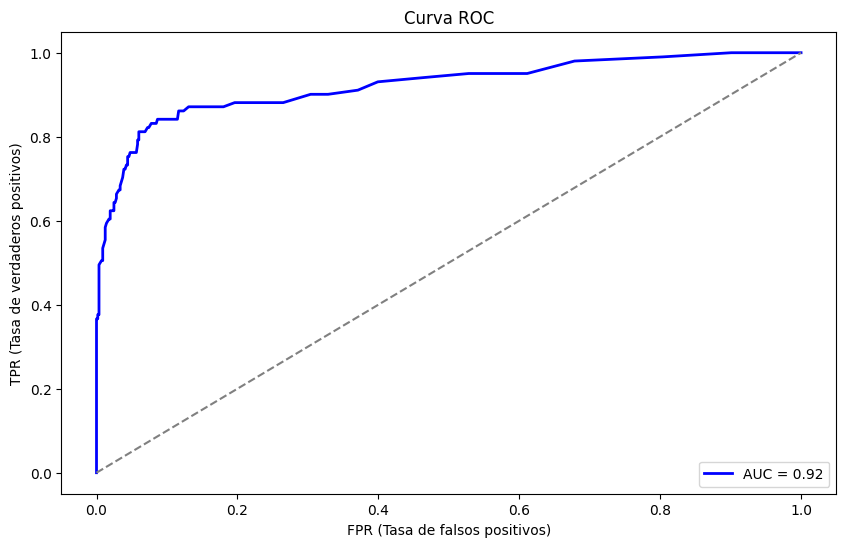

AUC: 0.9216754714340692


In [ ]:
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report, confusion_matrix

# Predecir en el conjunto de prueba
y_pred = best_rf.predict(X_test)

# Calcular el accuracy en el conjunto de prueba
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy en el conjunto de prueba: {test_accuracy}")

# Reporte de clasificación
print("\nReporte de clasificación (prueba):")
print(classification_report(y_test, y_pred))

# Matriz de confusión
print("Matriz de confusión en el conjunto de prueba:")
print(confusion_matrix(y_test, y_pred))

# Calcular la ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, best_rf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FPR (Tasa de falsos positivos)')
plt.ylabel('TPR (Tasa de verdaderos positivos)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc}")


El modelo tiene pocos falsos positivos (11 clientes que no cancelan fueron etiquetados como que cancelan) y un número moderado de falsos negativos (38 clientes que realmente cancelan fueron etiquetados como que no cancelan). Esto sugiere que el modelo podría mejorar su capacidad para identificar a todos los clientes que cancelan. Pero esta bastante bien en su mayoria, esto lo representa el grafico de abajo

El AUC de 0.92 es excelente, ya que se acerca a 1.0, lo que significa que el modelo tiene una excelente capacidad para discriminar entre las clases de cancelación y no cancelación.

Usando el modelo Random Forest con sus hiper parámetros ajustados, veremos los
15 clientes que presentan la mayor propensión a renunciar.

In [ ]:
# Obtener las probabilidades de que cada cliente renuncie (probabilidad de clase 1)
probabilidades = best_rf.predict_proba(X_test)[:, 1]

# Añadir las probabilidades al DataFrame de test (para visualizar qué clientes tienen mayor propensión)
clientes_con_probabilidad = X_test.copy()
clientes_con_probabilidad['Churn_prob'] = probabilidades

# Ordenar por la probabilidad de renunciar (de mayor a menor)
clientes_mayor_probabilidad = clientes_con_probabilidad.sort_values(by='Churn_prob', ascending=False)

# Mostrar los 15 clientes con mayor probabilidad de renunciar
top_15_clientes = clientes_mayor_probabilidad.head(15)
print(top_15_clientes)


      AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  \
2536           119                1         0       0.00              0   
605            112                1         0       0.00              2   
3272           133                1         0       0.00              2   
1538           113                1         0       0.00              5   
3144            35                1         0       0.00              5   
1345            98                1         0       0.00              4   
1878            39                1         0       0.00              1   
1078            80                1         0       0.00              0   
76              82                1         0       0.21              0   
2325           110                1         0       0.00              2   
859             93                1         0       0.00              3   
2924            96                1         0       0.00              1   
3169            78       

Con esto ya tenemos la informacion necesaria, sin embargo, una graficacion sera mas pertinente para entender mucho mejor esta presentacion de datos.

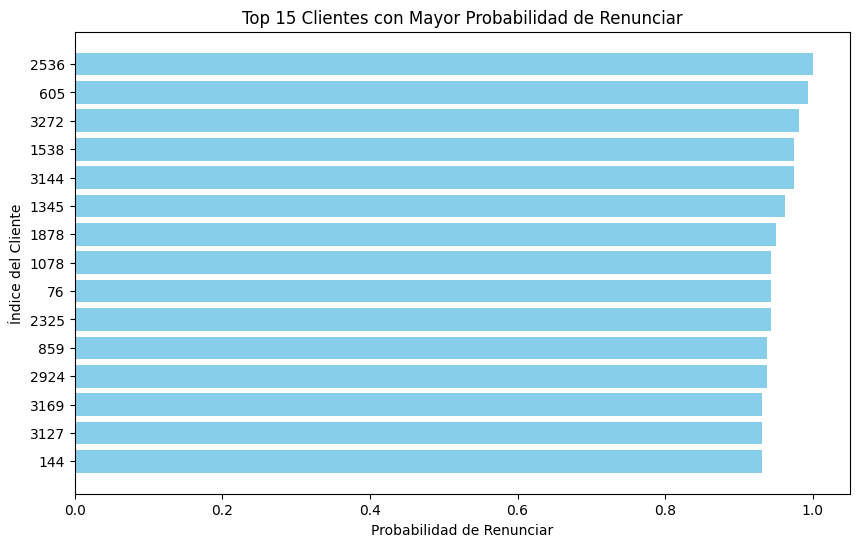

In [ ]:
import matplotlib.pyplot as plt

# Graficar las probabilidades de renuncia de los 15 principales clientes
plt.figure(figsize=(10, 6))
plt.barh(top_15_clientes.index.astype(str), top_15_clientes['Churn_prob'], color='skyblue')
plt.xlabel('Probabilidad de Renunciar')
plt.ylabel('Índice del Cliente')
plt.title('Top 15 Clientes con Mayor Probabilidad de Renunciar')
plt.gca().invert_yaxis()  # Para que los clientes con mayor probabilidad estén en la parte superior
plt.show()


CREO QUE ESTA ES UNA DE LAS PARTES MAS IMPORTANTES Y CLARAS DEL RESULTADO, gracias a las pruebas dadas anteriormente se puede obtener a quienes hay que llamar y atenderlos y asi obtener una diferencia objetiva en el CHURN.
Hipoteticamente, creo firmemente que estos 15 clientes deben ser atendidos cuanto antes, tener informacion de este tipo ayuda bastante a reducir la cantidad de llamadas en una empresa, trabajo de personal, de incomodar a otros clientes quienes no estan interesados en cambiarse ni moverse.

Este es el tipo de respuestas que me nos sirve para "bajar a tierra" toda la teoria que teniamos.